# Module 5 - Modern Portfolio Theory

# Query 5.1 
5.1 For your chosen stock, calculate the mean daily return and daily standard deviation of returns, and then just annualise them to get mean expected annual return and volatility of that single stock. **( annual mean = daily mean * 252 , annual stdev = daily stdev * sqrt(252) )**

In [28]:
#loading our dataset
import pandas as pd
MINDTREE = pd.read_csv('MINDTREE.csv')
MINDTREE.head(2)

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
0,MINDTREE,EQ,15-May-17,510.60,507.35,515.00,505.9,510.5,509.45,510.39,271952,138800509.8,8261,100362,36.90
1,MINDTREE,EQ,16-May-17,509.45,507.00,515.85,506.0,511.0,511.30,512.69,207011,106131728.2,5550,82090,39.65


In [29]:
#calculating the mean daily return
import numpy as np
MINDTREE['Daily Return'] = (MINDTREE['Close Price']).pct_change() *100
MINDTREE['Daily Return'] = MINDTREE['Daily Return'].replace([np.inf, -np.inf], np.nan)
MINDTREE = MINDTREE.dropna()
print("Mean Daily Return")
MeanVal = MINDTREE['Daily Return'].mean()
MeanVal

Mean Daily Return


0.15578165636875002

In [30]:
#calculating the daily standard deviation of returns
MINDTREE['Daily Standard Deviation'] = (MINDTREE['Close Price']).pct_change() *100
MINDTREE['Daily Standard Deviation'] = MINDTREE['Daily Standard Deviation'].replace([np.inf, -np.inf], np.nan)
MINDTREE = MINDTREE.dropna()
print("Daily Standard Deviation")
STDVal = MINDTREE['Daily Standard Deviation'].std()
STDVal

Daily Standard Deviation


2.153323274725807

In [31]:
#Annual Mean
annual_mean = MeanVal * 252
print("Annual Mean: "+ str(annual_mean))

Annual Mean: 39.256977404925


In [32]:
#Annual Standard Deviation
import math
annual_stdev = STDVal * math.sqrt(252)
print("Annual Standard Deviation: "+ str(annual_stdev))

Annual Standard Deviation: 34.18294726351021


# Query 5.2 
Now, we need to diversify our portfolio. Build your own portfolio by choosing any 5 stocks, preferably of different sectors and different caps. Assume that all 5 have the same weightage, i.e. 20% . Now calculate the annual returns and volatility of the entire portfolio ( Hint : Don't forget to use the covariance )

In [6]:
#building our portfolio by choosing 5 different stocks 
fortis_data = pd.read_csv('fortis_stock_data.csv', sep='\s*,\s*',header=0, encoding='ascii', engine='python')
ongc_data = pd.read_csv('ongc_stock_data.csv', sep='\s*,\s*',header=0, encoding='ascii', engine='python')
wipro_data = pd.read_csv('wipro_stock_data.csv')
itc_data = pd.read_csv('itc_stock_data.csv')
airtel_data = pd.read_csv('airtel_stock_data.csv')

In [7]:
#making a dataframe of these stock
l=[fortis_data , ongc_data , wipro_data , itc_data , airtel_data]
data = pd.DataFrame()
for i in l:
    data['{}'.format(i['Symbol'].iloc[1])] = i['Close Price']
data.head()

,FORTIS,ONGC,WIPRO,ITC,BHARTIARTL
0,128.90,149.70,257.75,337.10,381.30
1,128.35,153.10,257.70,334.30,385.90
2,128.70,151.65,268.25,333.30,405.70
3,129.80,153.40,263.20,330.40,395.45
4,130.55,152.40,263.80,328.85,397.10


In [38]:
#annualised return and volatility
import numpy as np
returns = data.pct_change().dropna()
returns.head()

,FORTIS,ONGC,WIPRO,ITC,BHARTIARTL
1,-0.004267,0.022712,-0.000194,-0.008306,0.012064
2,0.002727,-0.009471,0.040939,-0.002991,0.051309
3,0.008547,0.011540,-0.018826,-0.008701,-0.025265
4,0.005778,-0.006519,0.002280,-0.004691,0.004172
5,0.016469,0.059711,0.000948,0.030105,0.015235


In [9]:
mean_daily_returns = returns.mean()*252
mean_daily_returns

FORTIS        0.401097
ONGC          0.234681
WIPRO         0.383601
ITC          -1.080656
BHARTIARTL    0.032287
dtype: float64

In [10]:
std_daily_returns = returns.std()* np.sqrt(252)
std_daily_returns

FORTIS        0.170942
ONGC          0.307269
WIPRO         0.230951
ITC           0.322527
BHARTIARTL    0.221429
dtype: float64

In [11]:
mean_daily_returns = mean_daily_returns
cov_matrix = returns.cov()
cov_matrix

,FORTIS,ONGC,WIPRO,ITC,BHARTIARTL
FORTIS,0.000116,0.000024,-0.000019,0.000021,-0.000005
ONGC,0.000024,0.000375,0.000008,0.000017,-0.000003
WIPRO,-0.000019,0.000008,0.000212,-0.000002,0.000032
ITC,0.000021,0.000017,-0.000002,0.000413,0.000029
BHARTIARTL,-0.000005,-0.000003,0.000032,0.000029,0.000195


In [12]:
std_daily_returns = std_daily_returns
cov_matrix = returns.cov()
cov_matrix

,FORTIS,ONGC,WIPRO,ITC,BHARTIARTL
FORTIS,0.000116,0.000024,-0.000019,0.000021,-0.000005
ONGC,0.000024,0.000375,0.000008,0.000017,-0.000003
WIPRO,-0.000019,0.000008,0.000212,-0.000002,0.000032
ITC,0.000021,0.000017,-0.000002,0.000413,0.000029
BHARTIARTL,-0.000005,-0.000003,0.000032,0.000029,0.000195


In [13]:
weights = np.asarray([0.2 , 0.2 , 0.2 , 0.2 , 0.2]) 
portfolio_mean =  np.sum ( mean_daily_returns * weights )
portfolio_mean

-0.005797717884144998

In [14]:
portfolio_std_dev =  np.sum ( std_daily_returns * weights )
portfolio_std_dev

0.2506235308337841

In [15]:
print('Portfolio expected annualised return is {} and volatility is {}'.format(portfolio_mean,portfolio_std_dev))

Portfolio expected annualised return is -0.005797717884144998 and volatility is 0.2506235308337841


In [46]:
comp_return = np.array([mean_daily_returns])
comp_return

array([[ 0.40109727,  0.23468113,  0.38360147, -1.08065588,  0.03228742]])

In [47]:
comp_vol = np.array([std_daily_returns])
comp_vol

array([[0.17094206, 0.30726907, 0.23095079, 0.32252671, 0.22142903]])

# Query 5.3 
Prepare a scatter plot for differing weights of the individual stocks in the portfolio , the axes being the returns and volatility. Colour the data points based on the Sharpe Ratio ( Returns/Volatility) of that particular portfolio.

In [54]:
def returns_vol(comp_returns, comp_vol, n):
    return_vol = []
    for i in range(n):
        weight = np.random.rand(5)
        weight /= weight.sum()
        return_vol.append((np.dot(comp_return, weight), np.dot(comp_vol, weight)))
    return return_vol

In [55]:
scatter_data = returns_vol(comp_return, comp_vol, 10000)
weight_return = [k[0] for k in scatter_data]
weight_vol = [k[1] for k in scatter_data]
sharpe = [k[0]/k[1] for k in scatter_data]

[Text(0,0.5,'% returns'), Text(0.5,0,'% volatility')]

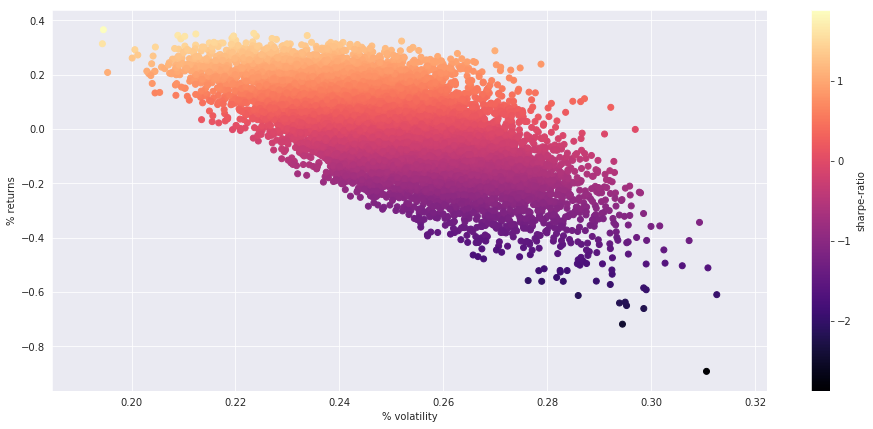

In [56]:
plt.figure(figsize= (16,7))
sns.set_style('darkgrid')

plt.scatter(weight_vol, weight_return, c = sharpe, cmap='magma')
plt.colorbar(label= 'sharpe-ratio')
plt.gca().set(xlabel = '% volatility', ylabel ='% returns')

# another way to do it

In [16]:
returns=returns.dropna()
returns.head()

,FORTIS,ONGC,WIPRO,ITC,BHARTIARTL
1,-0.004267,0.022712,-0.000194,-0.008306,0.012064
2,0.002727,-0.009471,0.040939,-0.002991,0.051309
3,0.008547,0.011540,-0.018826,-0.008701,-0.025265
4,0.005778,-0.006519,0.002280,-0.004691,0.004172
5,0.016469,0.059711,0.000948,0.030105,0.015235


In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

num_portfolios = 10000
#set up array to hold results
results = np.zeros((3,num_portfolios))

In [18]:
mean_daily_returns

FORTIS        0.401097
ONGC          0.234681
WIPRO         0.383601
ITC          -1.080656
BHARTIARTL    0.032287
dtype: float64

In [19]:
for i in range(num_portfolios):
    weights = np.random.random(5)
    #rebalance weights to sum to 1
    weights /= np.sum(weights)
    portfolio_return = np.sum(mean_daily_returns * weights)
    portfolio_std_dev = np.sum (std_daily_returns * weights )
    #store results in results array
    results[0,i] = portfolio_return
    results[1,i] = portfolio_std_dev
    #store Sharpe Ratio (return / volatility) - risk free rate element excluded for simplicity
    results[2,i] = results[0,i] / results[1,i]    
    
#convert results array to Pandas DataFrame
results_frame = pd.DataFrame(results.T,columns=['Return','STD','Sharpe'])
results_frame.head()

,Return,STD,Sharpe
0,0.044543,0.241629,0.184346
1,-0.141658,0.256368,-0.552558
2,0.142935,0.246564,0.579708
3,0.215603,0.233837,0.922022
4,0.027334,0.275275,0.099296


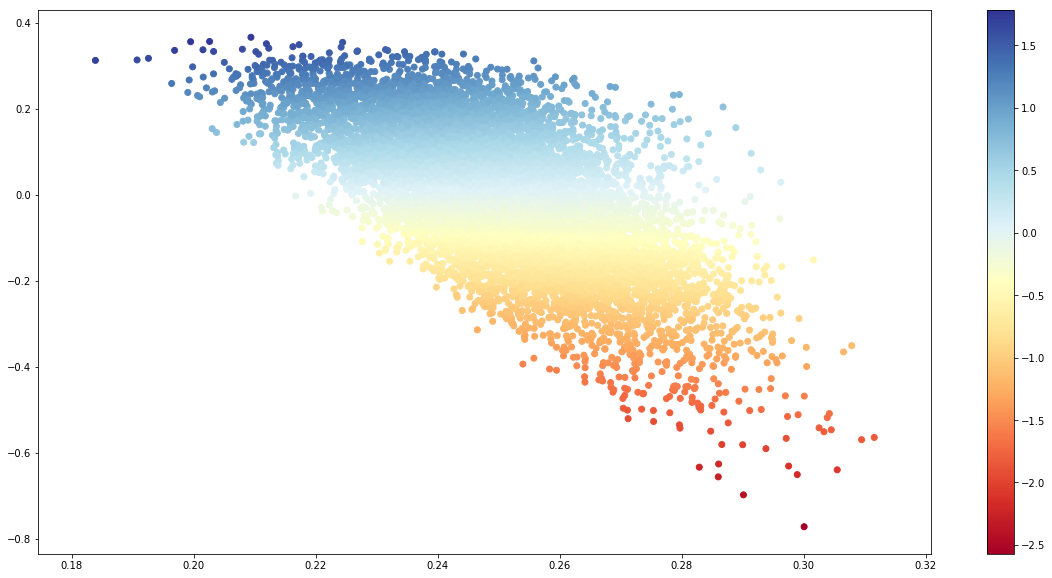

In [20]:
#create scatter plot coloured by Sharpe Ratio
plt.figure(figsize=(20,10))
plt.scatter(results_frame.STD,results_frame.Return,c=results_frame.Sharpe,cmap='RdYlBu')
plt.colorbar()

# Query 5.4 
Mark the 2 portfolios where -

Portfolio 1 - The Sharpe ratio is the highest

Portfolio 2 - The volatility is the lowest. 

In [62]:
stocks = ['Fortis','Ongc','Wipro','Itc','Airtel']
num_portfolios = 25000

In [63]:
mean_daily_returns

FORTIS        0.401097
ONGC          0.234681
WIPRO         0.383601
ITC          -1.080656
BHARTIARTL    0.032287
dtype: float64

In [64]:
#set up array to hold results We have increased the size of the array to hold the weight values for each stock
results = np.zeros((4+len(stocks)-1,num_portfolios))
for i in range(num_portfolios):
    weights = np.random.random(5)
    #rebalance weights to sum to 1
    weights /= np.sum(weights)
    portfolio_return = np.sum(mean_daily_returns * weights)
    portfolio_std_dev = np.sum (std_daily_returns * weights)
    #store results in results array
    results[0,i] = portfolio_return
    results[1,i] = portfolio_std_dev
    #store Sharpe Ratio (return / volatility) - risk free rate element excluded for simplicity
    results[2,i] = results[0,i] / results[1,i]  
     #iterate through the weight vector and add data to results array
    for j in range(len(weights)):
        results[j+3,i] = weights[j]

In [71]:
#convert results array to Pandas DataFrame
results_frame = pd.DataFrame(results.T,columns=['Return','STDev','Sharpe',stocks[0],stocks[1],stocks[2],stocks[3],stocks[4]])
#locate position of portfolio with highest Sharpe Ratio
max_sharpe_port = results_frame.iloc[results_frame['Sharpe'].idxmax()]
#locate positon of portfolio with minimum standard deviation
min_vol_port = results_frame.iloc[results_frame['STDev'].idxmin()]

In [72]:
results_frame.head(2)

,Return,STDev,Sharpe,Fortis,Ongc,Wipro,Itc,Airtel
0,-0.226336,0.261793,-0.864561,0.279007,0.157209,0.126098,0.393229,0.044457
1,0.075743,0.265592,0.285184,0.065215,0.423696,0.122076,0.098152,0.290861


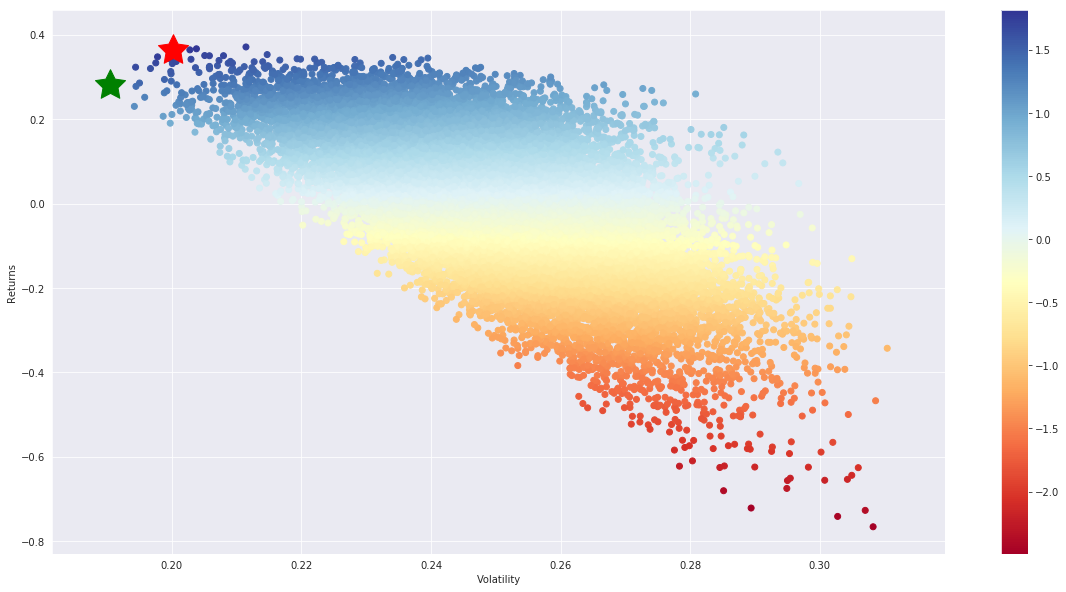

In [75]:
#create scatter plot coloured by Sharpe Ratio
plt.figure(figsize=(20,10))
plt.scatter(results_frame.STDev,results_frame.Return,c=results_frame.Sharpe,cmap='RdYlBu')
plt.xlabel('Volatility')
plt.ylabel('Returns')
plt.colorbar()
#plot red star to highlight position of portfolio with highest Sharpe Ratio
plt.scatter(max_sharpe_port[1],max_sharpe_port[0],marker=(5,1,0),color='r',s=1000)
#plot green star to highlight position of minimum variance portfolio
plt.scatter(min_vol_port[1],min_vol_port[0],marker=(5,1,0),color='g',s=1000)